<a href="https://colab.research.google.com/github/smitapatil1/simple-linear-regration/blob/main/delivery_time_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*1) Delivery_time -> Predict delivery time using sorting time*

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


*Load Data*

In [1]:
import pandas as pd


In [2]:
data=pd.read_csv("/content/delivery_time (1).csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
#Renaming all columns
df = data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)

In [5]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# *EDA*



In [7]:
df.shape


(21, 2)

In [8]:
df.head()


,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
df.dtypes


Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [10]:
#check for missing values
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

<Axes: >

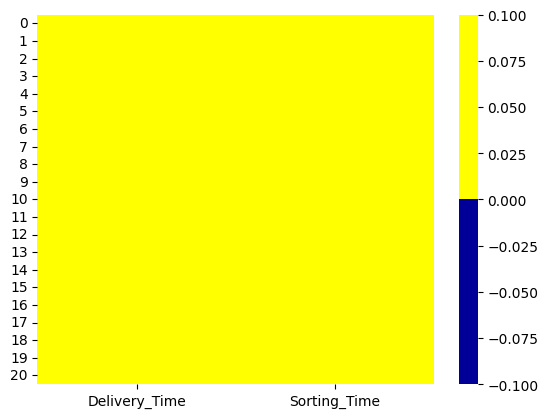

In [11]:
#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

Hence we can conclude no missing values



In [12]:
#to check for duplicate rows
df[df.duplicated()].shape

(0, 2)

No duplicate rows



In [13]:
df.describe()


,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7b86d3bf2950>,
 'caps': [<matplotlib.lines.Line2D at 0x7b86d3bf2e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b86d3bf26b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b86d3bf33d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b86d3bf3670>],
 'means': []}

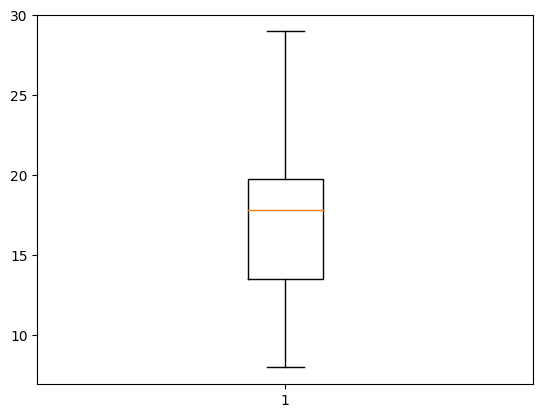

In [14]:

#Outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(df['Delivery_Time'])

<ipython-input-15-8f2a45c53999>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Delivery_Time)


<Axes: xlabel='Delivery_Time', ylabel='Density'>

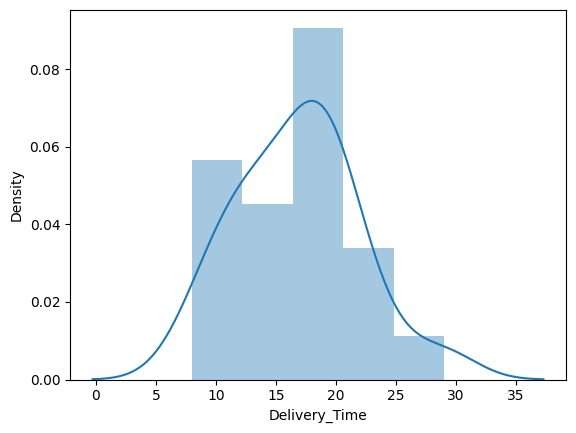

In [15]:
import seaborn as sns
sns.distplot(df.Delivery_Time)


{'whiskers': [<matplotlib.lines.Line2D at 0x7b86d3b06c20>,
 'caps': [<matplotlib.lines.Line2D at 0x7b86d3b07160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b86d3b06aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b86d3b076a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b86d3b07940>],
 'means': []}

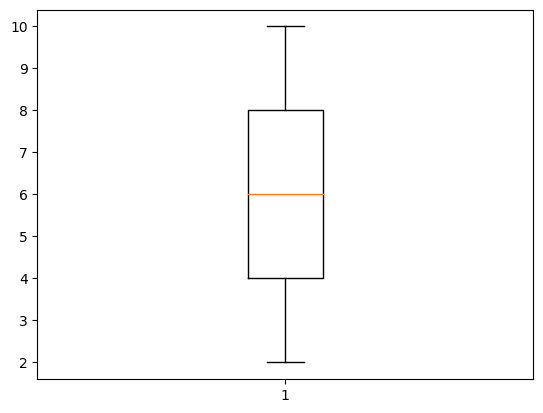

In [16]:
plt.boxplot(df['Sorting_Time'])


<ipython-input-17-0c142cfee392>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sorting_Time)


<Axes: xlabel='Sorting_Time', ylabel='Density'>

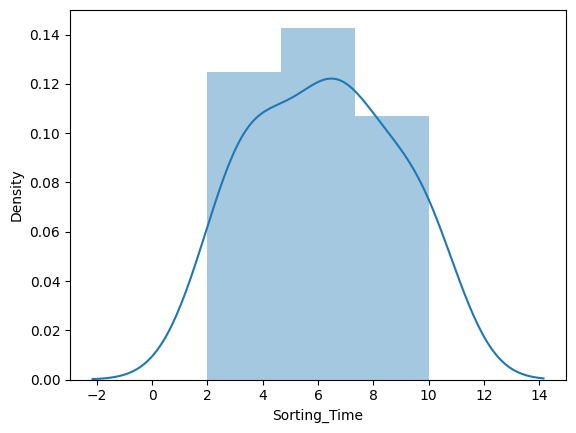

In [17]:
sns.distplot(df.Sorting_Time)


Here, we can coclude there are no outliers.



# - Performing Transformation on each column



In [18]:
import numpy as np


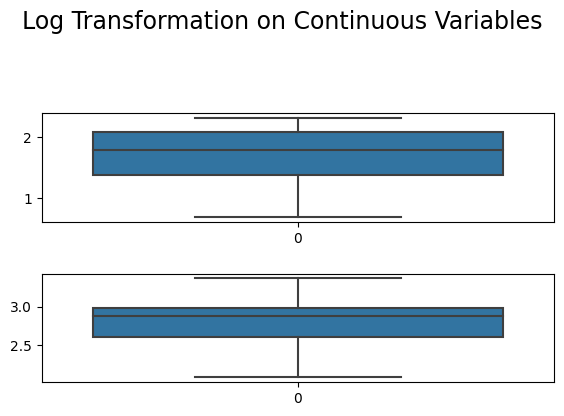

In [19]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.log(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.log(df.Delivery_Time), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

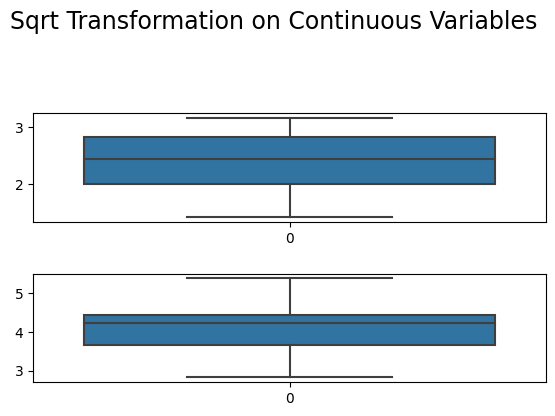

In [20]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.sqrt(df.Delivery_Time), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


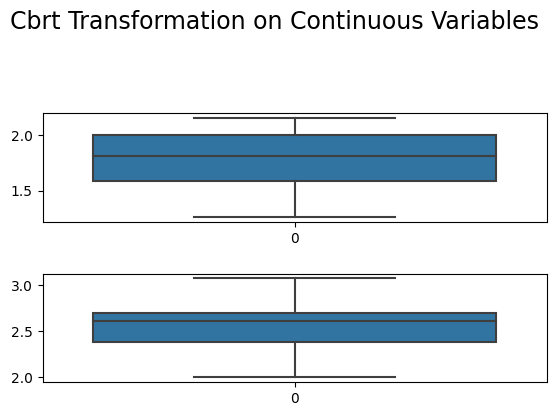

In [21]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.cbrt(df.Delivery_Time), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


In [22]:
#Correlation coef
df.corr()


,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


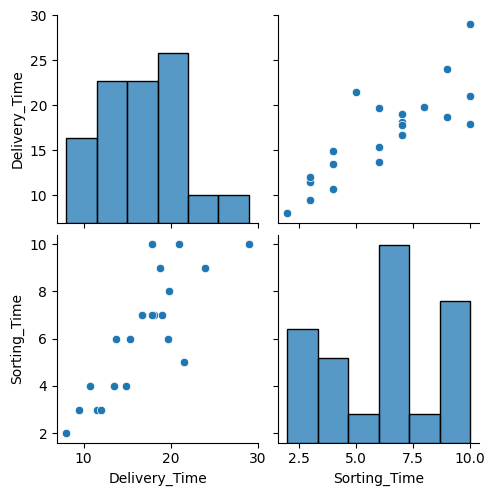

In [23]:
sns.pairplot(df)


In [24]:
import statsmodels.formula.api as smf


In [25]:
model = smf.ols("Delivery_Time~Sorting_Time", data=df).fit()


In [26]:
#model parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [27]:
#get t-values & p-values
print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [28]:
#r squared value
model.rsquared


0.6822714748417231

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        05:48:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

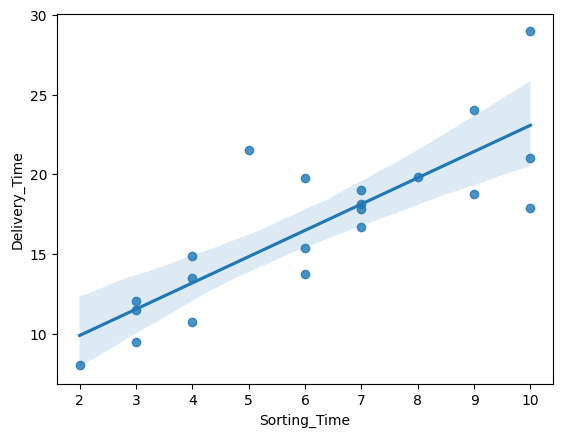

In [30]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time", data = df)


# Prediction

In [31]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10])

In [32]:
data_pred = pd.DataFrame(newdata, columns = ['Sorting_Time'])


In [33]:
data_pred


,Sorting_Time
0,5
1,10


In [34]:
model.predict(data_pred)


0    14.827833
1    23.072933
dtype: float64